In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [25]:
#access the new_data.csv created through Data Exploration 
df = pd.read_csv('new_data.csv')

#We need to see what we are working with now
df.head()


,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69


In [5]:
#check the shape of the file
print(df.shape)

(399, 10)


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   diagnosis      399 non-null    object 
 1   ID             399 non-null    object 
 2   imaginary_min  100 non-null    float64
 3   imaginary_avg  100 non-null    float64
 4   real_min       100 non-null    float64
 5   real_avg       100 non-null    float64
 6   gender         399 non-null    float64
 7   age            399 non-null    int64  
 8   smoking        399 non-null    float64
 9   age_bin        399 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 31.3+ KB


In [7]:
#checking the null values in the data file

pd.isnull(df)

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
394,False,False,True,True,True,True,False,False,False,False
395,False,False,True,True,True,True,False,False,False,False
396,False,False,True,True,True,True,False,False,False,False
397,False,False,True,True,True,True,False,False,False,False


In [8]:
#check the number of missing values per variable, using the is.null function.
df.isnull().sum()

diagnosis          0
ID                 0
imaginary_min    299
imaginary_avg    299
real_min         299
real_avg         299
gender             0
age                0
smoking            0
age_bin            0
dtype: int64

In [9]:
#comparing it with number of number of nonmissing values.
df.count()

diagnosis        399
ID               399
imaginary_min    100
imaginary_avg    100
real_min         100
real_avg         100
gender           399
age              399
smoking          399
age_bin          399
dtype: int64

In [11]:
#Missing values are automatically omitted from summary statistics, such as describe()
df['imaginary_min'].describe()

count    100.000000
mean    -314.941800
std       28.422753
min     -337.350000
25%     -327.780000
50%     -323.000000
75%     -320.610000
max     -225.000000
Name: imaginary_min, dtype: float64

Filling the Missing values


Replacing the null values with the median for imaginary_min,real_min  and mean for imaginary_avg, real_avg repectively so that we don't change the overall statistics of that column. We didn't remove the null values rows as it will also remove the other important infromation from the data.


In [26]:
df['imaginary_min'].fillna(int(df['imaginary_min'].min()), inplace=True)

In [27]:
df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,NaN,NaN,NaN,0.0,49,2.0,40-49
395,Infected,I177,-337.00,NaN,NaN,NaN,0.0,37,1.0,30-39
396,Infected,I178,-337.00,NaN,NaN,NaN,0.0,29,1.0,20-29
397,Infected,I179,-337.00,NaN,NaN,NaN,1.0,51,1.0,50-59


In [28]:
df['imaginary_avg'].fillna(int(df['imaginary_avg'].mean()), inplace=True)

In [16]:
df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-314.00,-304.000000,NaN,NaN,0.0,49,2.0,40-49
395,Infected,I177,-314.00,-304.000000,NaN,NaN,0.0,37,1.0,30-39
396,Infected,I178,-314.00,-304.000000,NaN,NaN,0.0,29,1.0,20-29
397,Infected,I179,-314.00,-304.000000,NaN,NaN,1.0,51,1.0,50-59


In [29]:
df['real_min'].fillna(int(df['real_min'].min()), inplace=True)

In [30]:
df['real_avg'].fillna(int(df['real_avg'].mean()), inplace=True)

In [31]:
df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,-304.000000,-626.00,-458.000000,0.0,49,2.0,40-49
395,Infected,I177,-337.00,-304.000000,-626.00,-458.000000,0.0,37,1.0,30-39
396,Infected,I178,-337.00,-304.000000,-626.00,-458.000000,0.0,29,1.0,20-29
397,Infected,I179,-337.00,-304.000000,-626.00,-458.000000,1.0,51,1.0,50-59


Outliers/ Noise

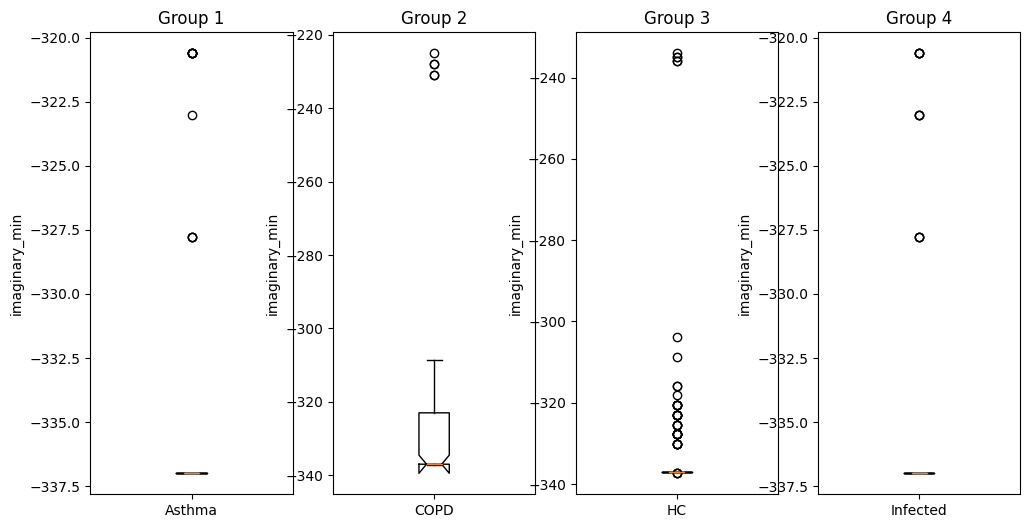

In [34]:
#visulizing the outliers with box plot

import matplotlib.pyplot as plt

# Group data by target variable
groups = df.groupby('diagnosis')

# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups), figsize=(12,6))
for i, (name, group) in enumerate(groups):
    axs[i].boxplot(group['imaginary_min'], notch=True)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('imaginary_min')

Linear Regression:

We created a linear regression model for each group using the OLS function from the statsmodels library, with 'Imaginary_min' from Saliva Permittivity as the predictor variables and 'real_min' as the response variable. We then predicted the expected values for each data point using the predict method of the linear regression model, and calculated the residuals as the difference between the predicted values and the actual values.

We identified outliers as any data point with a residual greater than 3 times the standard deviation of the residuals, and stored the outliers for each group in a list.

Finally, we created a clean copy of the dataset and removed the outliers from each group using the drop method from Pandas.

In [37]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups:
    # Create linear regression model
    X = group[['real_min']]
    y = group['imaginary_min']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean = df.copy()
for group_outliers in outliers:
    df_clean = df_clean.drop(group_outliers.index)


In [41]:
df_clean

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,-304.000000,-626.00,-458.000000,0.0,49,2.0,40-49
395,Infected,I177,-337.00,-304.000000,-626.00,-458.000000,0.0,37,1.0,30-39
396,Infected,I178,-337.00,-304.000000,-626.00,-458.000000,0.0,29,1.0,20-29
397,Infected,I179,-337.00,-304.000000,-626.00,-458.000000,1.0,51,1.0,50-59


In [42]:
groups2 = df_clean.groupby('diagnosis')


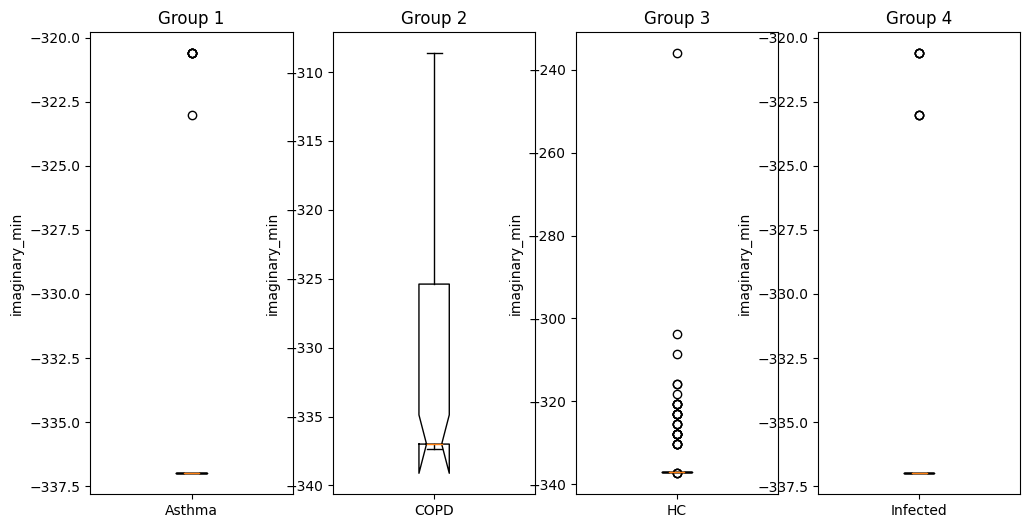

In [44]:
# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups2), figsize=(12,6))
for i, (name, group) in enumerate(groups2):
    axs[i].boxplot(group['imaginary_min'], notch=True)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('imaginary_min')

The number of outliers are less compared to the previous box plots

Repeating the same for the imaginary_avg and real_avg

In [45]:
# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups2:
    # Create linear regression model
    X = group[['real_avg']]
    y = group['imaginary_avg']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean_final = df_clean.copy()
for group_outliers in outliers:
    df_clean_final = df_clean_final.drop(group_outliers.index)

In [46]:
df_clean_final

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,-304.000000,-626.00,-458.000000,0.0,49,2.0,40-49
395,Infected,I177,-337.00,-304.000000,-626.00,-458.000000,0.0,37,1.0,30-39
396,Infected,I178,-337.00,-304.000000,-626.00,-458.000000,0.0,29,1.0,20-29
397,Infected,I179,-337.00,-304.000000,-626.00,-458.000000,1.0,51,1.0,50-59


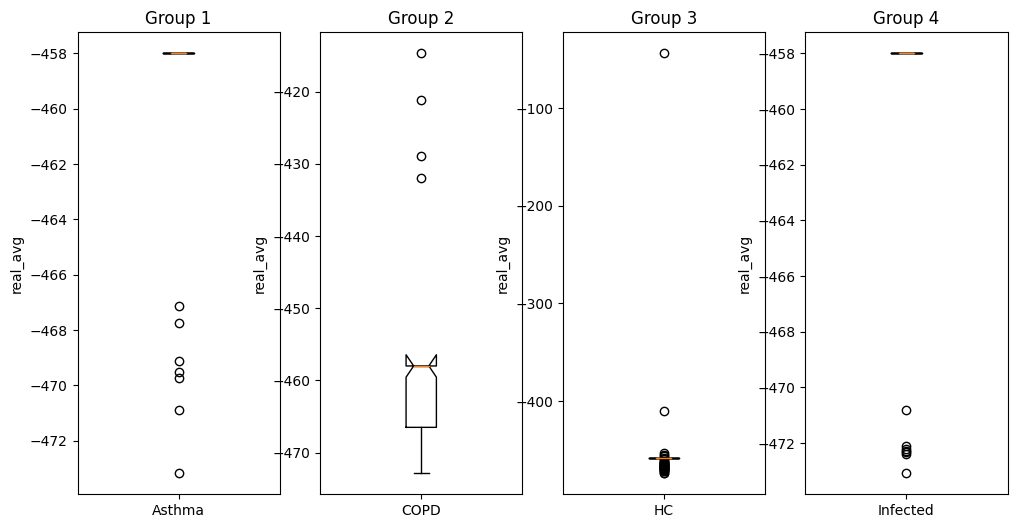

In [49]:
# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups2), figsize=(12,6))
for i, (name, group) in enumerate(groups2):
    axs[i].boxplot(group['real_avg'], notch=True)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('real_avg')

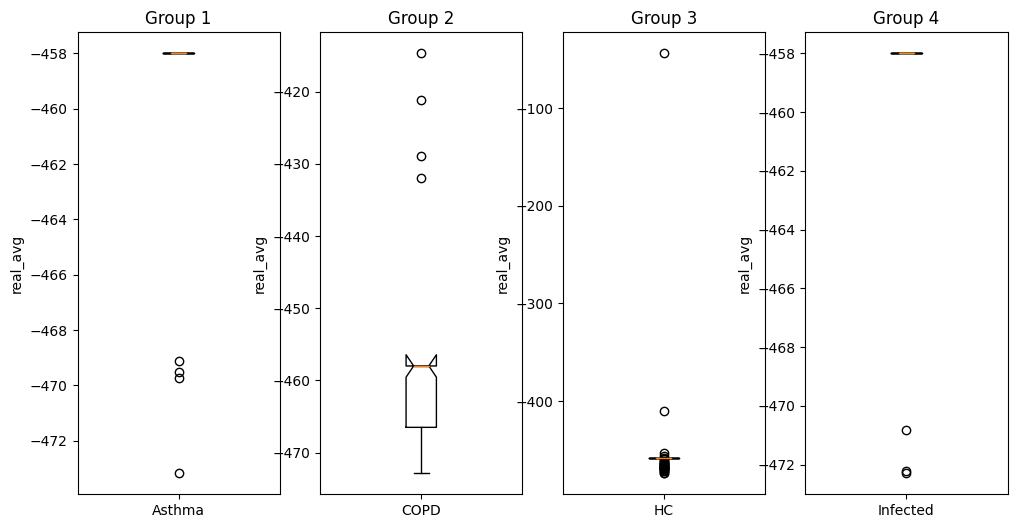

In [50]:
group3=df_clean_final.groupby('diagnosis')

# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(group3), figsize=(12,6))
for i, (name, group) in enumerate(group3):
    axs[i].boxplot(group['real_avg'], notch=True)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('real_avg')

In [51]:
#Finally saving the data as new csv file

df.to_csv('clean_data.csv', index=False)